In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the path to your JSON file
file_path = '/home/newuser/Downloads/robustness_exp/q6_result.json'
sweep_file = '/home/newuser/Downloads/robustness_exp/tpch_q6_sweep.csv'
# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

table = pd.read_csv(sweep_file,index_col=0)



In [2]:

col1_name = list(data.keys())[0]  # col1name
col2_name = list(data.keys())[1]  # col2name
col3_name = list(data.keys())[2]  # col3name

col1_values = data[col1_name]
col2_values = data[col2_name]
col3_values = data[col3_name]


In [3]:
deviation_log = data['deviation_log']


[(0, 601, 566.9270969856368), (1, 600, 685.1507868992816), (2, 603, 1.7812506415897416), (3, 603, 1.6942779385131004), (4, 603, 1.834387218930425), (5, 604, 1.319366352819868), (6, 57, 1.7199206022472544), (7, 57, 1.8558195254190164), (8, 57, 1.7489220454081764), (9, 610, 1.326654475144281), (10, 611, 1.604014316663973), (11, 612, 1.7366601156834265), (12, 612, 1.7538770505069228), (13, 612, 1.8351432376892958), (14, 615, 1.368121360431002), (15, 66, 1.8828743067138578), (16, 66, 1.9572012696193157), (17, 66, 1.7918216860690952), (18, 619, 2.094320275272477), (19, 619, 2.1430138059611115), (20, 619, 2.1443280899460517), (21, 622, 1.5740619682900527), (22, 623, 1.5885447875968), (23, 74, 1.8607753659296067), (24, 74, 1.742530950830678), (25, 626, 2.161941475556029), (26, 626, 2.256733221998689), (27, 626, 2.070862500135462), (28, 629, 1.6335271286444584), (29, 630, 1.674901303314765), (30, 631, 1.5848656688255816), (31, 82, 2.0991591755877197), (32, 633, 2.220996797763379), (33, 633, 2.

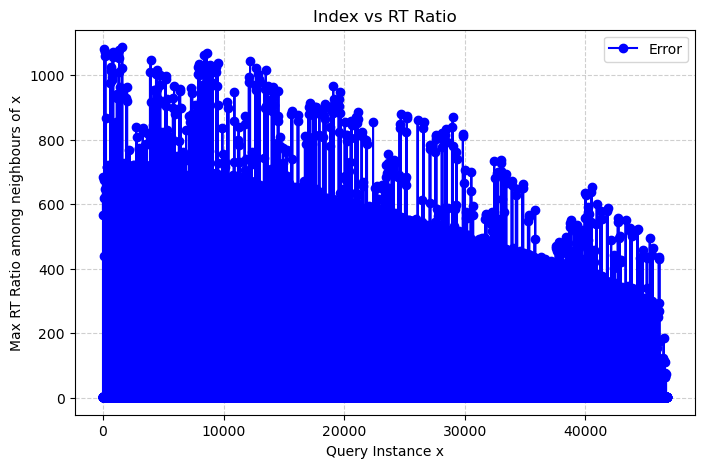

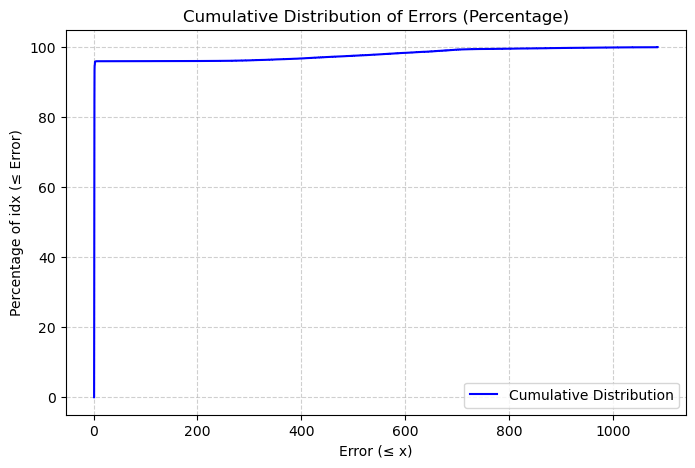

In [4]:
from collections import defaultdict
result = defaultdict(lambda: (None, float('-inf')))

# Iterate through the data to calculate maxidx and max_error
for idx1, idx2, error in deviation_log:
    current_maxidx, current_max_error = result[idx1]
    if error > current_max_error:
        result[idx1] = (idx2, error)

# Convert to a list of tuples if needed
result_list = [(idx, maxidx, max_error) for idx, (maxidx, max_error) in result.items()]

# Print the result
print(result_list)

# Extract idx and max_error for plotting
idx_values = [entry[0] for entry in result_list]
max_errors = [entry[2] for entry in result_list]

# Create the 2D plot
plt.figure(figsize=(8, 5))
plt.plot(idx_values, max_errors, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('Query Instance x')
plt.ylabel('Max RT Ratio among neighbours of x')
plt.title('Query Instance vs RT Ratio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Extract the errors
errors = [entry[2] for entry in result_list]

# Sort errors to compute cumulative count
sorted_errors = np.sort(errors)
cumulative_count = np.arange(1, len(sorted_errors) + 1)

# Convert cumulative count to percentage
cumulative_percentage = (cumulative_count / len(sorted_errors)) * 100

# Create the plot
plt.figure(figsize=(8, 5))
plt.step(sorted_errors, cumulative_percentage, where="post", color="b", label="Cumulative Distribution")
plt.xlabel("RT Ratio x")
plt.ylabel("Percentage of instances with x RT Ratio")
plt.title("Cumulative Distribution of RT Ratio (Percentage)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

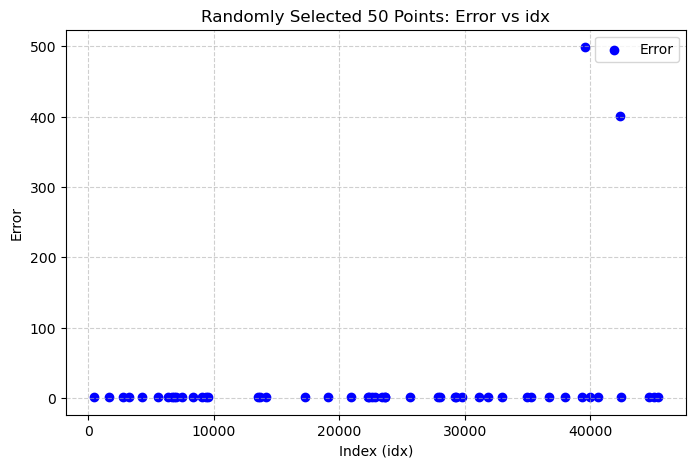

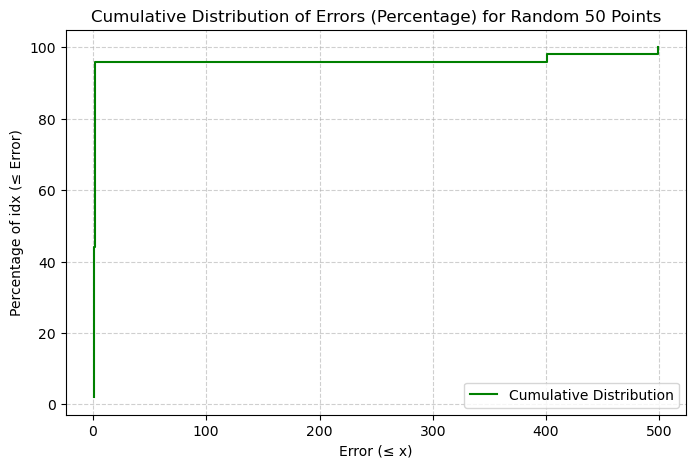

In [5]:
import random

# Randomly select 50 indices from the result list (if you have less than 50, it will select all of them)
random_indices = random.sample(result_list, min(50, len(result_list)))
random.seed(3) 
# Extract idx and errors
idx_values = [entry[0] for entry in random_indices]
errors = [entry[2] for entry in random_indices]

# 1. First 2D plot: idx vs error
plt.figure(figsize=(8, 5))
plt.scatter(idx_values, errors, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('Query Instance x')
plt.ylabel('Max RT Ratio among neighbours of x')
plt.title('Query Instance vs RT Ratio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 2. Second 2D plot: Cumulative distribution of errors
# Sort the errors to compute cumulative percentage
sorted_errors = np.sort(errors)
cumulative_count = np.arange(1, len(sorted_errors) + 1)

# Convert cumulative count to percentage
cumulative_percentage = (cumulative_count / len(sorted_errors)) * 100

plt.figure(figsize=(8, 5))
plt.step(sorted_errors, cumulative_percentage, where="post", color="g", label="Cumulative Distribution")
plt.xlabel("RT Ratio x")
plt.ylabel("Percentage of instances with x RT Ratio")
plt.title("Cumulative Distribution of RT Ratio (Percentage)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()